In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

Generate Data

In [24]:
np.random.seed(42)

# Generate data
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 0.5 * X**3 - X**2 + X + np.random.randn(100, 1) * 3

# Train / test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [25]:
# Simple Linear model for non-linear data

model = LinearRegression()
model.fit(X_train, y_train)

train_error = mean_squared_error(y_train, model.predict(X_train))
test_error = mean_squared_error(y_test, model.predict(X_test))

print("High Bias Model high error due to underfitting")
print("Train Error:", train_error)
print("Test Error:", test_error)

High Bias Model high error due to underfitting
Train Error: 15.513441500678706
Test Error: 16.561507320020507


In [26]:
#Fix the issue by using Polynomial Features

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

train_error = mean_squared_error(y_train, model.predict(X_train_poly))
test_error = mean_squared_error(y_test, model.predict(X_test_poly))

print("\nLower Bias Model")
print("Train Error:", train_error)
print("Test Error:", test_error)


Lower Bias Model
Train Error: 7.814835752930031
Test Error: 5.022819593983089


In [27]:
# High Variance Example

poly = PolynomialFeatures(degree=25)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

train_error = mean_squared_error(y_train, model.predict(X_train_poly))
test_error = mean_squared_error(y_test, model.predict(X_test_poly))

print("\nHigh Variance Model low train error but high test error")
print("Train Error:", train_error)
print("Test Error:", test_error)


High Variance Model low train error but high test error
Train Error: 5.8814336804319
Test Error: 86.86742897575554


In [ ]:
# Fix High Variance with Regularization

model = Ridge(alpha=1.0)  # L2 regularization
model.fit(X_train_poly, y_train)

train_error = mean_squared_error(y_train, model.predict(X_train_poly))
test_error = mean_squared_error(y_test, model.predict(X_test_poly))

print("\nRegularized Model")
print("Train Error:", train_error)
print("Test Error:", test_error)


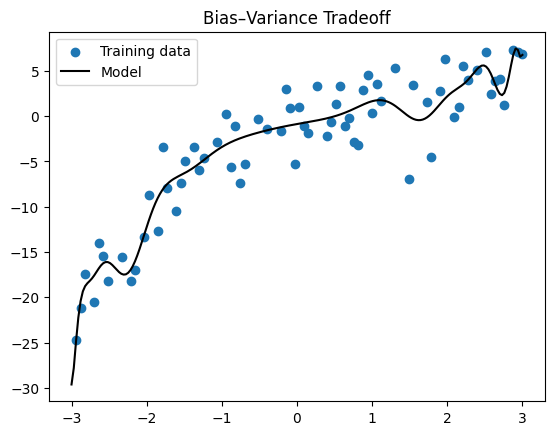

In [ ]:
#Visualization
X_plot = np.linspace(-3, 3, 200).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)

plt.scatter(X_train, y_train, label="Training data")
plt.plot(X_plot, model.predict(X_plot_poly), color="black", label="Model")
plt.legend()
plt.title("Bias–Variance Tradeoff")
plt.show()